      Classe d'âge  Pourcentage
0  19 ans et moins    13.469661
1  20 ans à 29 ans    23.948475
2  30 ans à 39 ans    15.160508
3  40 ans à 49 ans    15.086949
4  50 ans à 59 ans    14.104407
5   60 ans et plus    14.064576
6   Non communiqué    16.448571


/Users/pruvost/ETUDE_SNCF_CLASSE_AGE.pdf

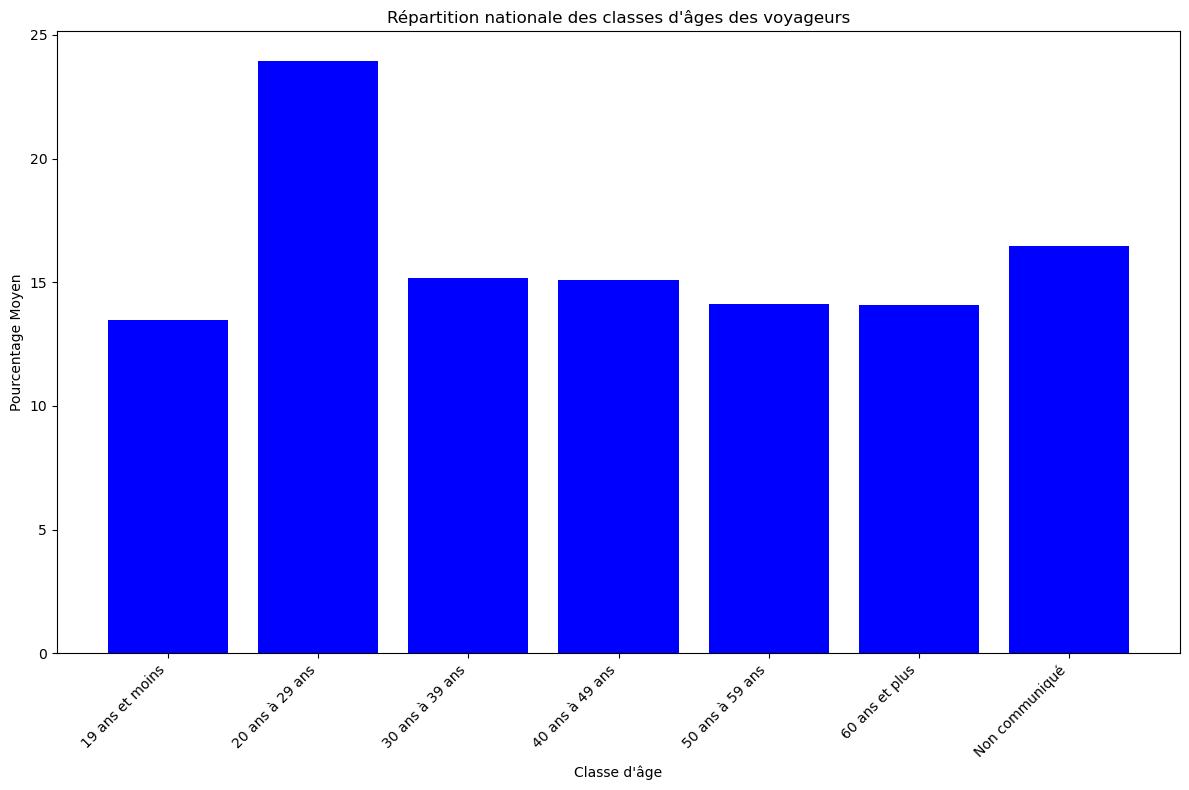

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'enquetes-gares-connexions-repartition-repartition-par-classe-dage.csv'
data = pd.read_csv(file_path, delimiter=';') 


data.columns = ['UIC', 'Gare enquêtée', "Classe d'âge", 'Pourcentage', 'Année']


data['Pourcentage'] = pd.to_numeric(data['Pourcentage'], errors='coerce')
data['Année'] = pd.to_numeric(data['Année'], errors='coerce')


mean_percentage_by_motif = data.groupby("Classe d'âge")['Pourcentage'].mean().reset_index()


motif_order = ["19 ans et moins", "20 ans à 29 ans", "30 ans à 39 ans", "40 ans à 49 ans", "50 ans à 59 ans", "60 ans et plus", "Non communiqué"]
mean_percentage_by_motif["Classe d'âge"] = pd.Categorical(mean_percentage_by_motif["Classe d'âge"], categories=motif_order, ordered=True)


mean_percentage_by_motif = mean_percentage_by_motif.sort_values("Classe d'âge")


print(mean_percentage_by_motif)


plt.figure(figsize=(12, 8)) 
plt.bar(mean_percentage_by_motif["Classe d'âge"], mean_percentage_by_motif['Pourcentage'], color='blue')
plt.xlabel("Classe d'âge") 
plt.ylabel('Pourcentage Moyen')  
plt.title("Répartition nationale des classes d'âges des voyageurs")  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  



plt.savefig('ETUDE_SNCF_CLASSE_AGE.pdf')
from IPython.display import FileLink

display(FileLink('ETUDE_SNCF_CLASSE_AGE.pdf'))
plt.show() 